In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

In [2]:
# loading mnist data from keras library

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [7]:
# 60,000 images each with 28x28 dim (pixel),  60,000 in Y shows labels
# Training data = 60,000 images
# Test data = 10,000 images
# Image dimension 28x28

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
# printing 10th image

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

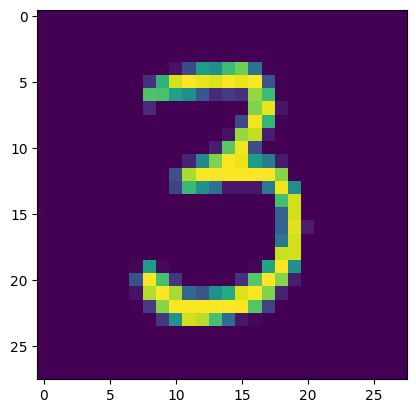

3


In [15]:
# printing 50th image with it's corresponding label

plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

In [16]:
# checking unique values in Y

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
# we can use above values as same or apply one hot encoding
# here dim are same so no need to resize images

In [20]:
# scaling the values

X_train = X_train/255
X_test = X_test/255
print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [115]:
# setting up Neural Network

#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(28,28)), # to flatten (1 dim) values of above multidim matrix
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(50, activation='relu'),
#    keras.layers.Dense(10, activation='softmax') # Because of 10 values (0-9)
#])

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
BatchNormalization()
Dropout(0.2)
model.add(Dense(128, activation='relu'))
BatchNormalization()
Dropout(0.2)
model.add(Dense(64, activation='relu'))
BatchNormalization()
Dropout(0.2)
model.add(Dense(10, activation='softmax'))

In [113]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy:

In [26]:
# Accuracy on test data

loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

  1/313 [..............................] - ETA: 40s - loss: 1.0062 - accuracy: 0.5312

2024-02-07 15:45:33.894192: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step - loss: 1.1863 - accuracy: 0.5382
1.1863163709640503
0.5382000207901001


In [27]:
Y_pred = model.predict(X_test)

107/313 [=========>....................] - ETA: 0s

2024-02-07 15:47:43.310739: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 927us/step


In [29]:
Y_pred.shape

(10000, 10)

In [31]:
Y_pred[0]

array([3.8764628e-07, 2.2306055e-01, 8.0394311e-05, 1.4411397e-03,
       7.8216845e-01, 6.4202445e-03, 3.3967322e-06, 9.9703395e-01,
       1.8737094e-02, 9.7228253e-01], dtype=float32)

In [34]:
Y_test[0]

7

In [32]:
# converting the prediction probability to class label

label_for_first_image = np.argmax(Y_pred[0])
label_for_first_image

7

In [36]:
# converting the prediction probability to class label for all data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 9, 1, 9, 9, 5, 7, 6, 8, 7, 0, 1, 3, 7, 7, 2, 9, 7, 6, 4, 5, 9, 0, 7, 9, 0, 1, 8, 1, 2, 0, 7, 2, 7, 1, 2, 1, 1, 7, 7, 3, 3, 6, 1, 6, 9, 9, 6, 2, 4, 8, 6, 0, 4, 1, 7, 4, 7, 5, 4, 3, 7, 4, 8, 7, 2, 0, 7, 0, 2, 1, 1, 7, 3, 9, 9, 7, 7, 6, 2, 7, 4, 4, 7, 5, 6, 1, 3, 6, 9, 3, 1, 7, 1, 1, 6, 7, 5, 0, 4, 9, 4, 7, 2, 1, 9, 9, 3, 1, 8, 7, 1, 9, 9, 9, 9, 4, 6, 9, 7, 5, 7, 9, 6, 4, 8, 4, 6, 6, 6, 7, 8, 1, 0, 1, 6, 7, 6, 7, 1, 1, 7, 1, 8, 2, 0, 8, 9, 8, 4, 8, 1, 5, 6, 0, 3, 9, 9, 0, 6, 7, 5, 2, 4, 8, 1, 4, 9, 1, 2, 8, 3, 7, 1, 8, 1, 3, 1, 3, 4, 0, 3, 9, 2, 2, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 9, 3, 2, 6, 1, 1, 1, 8, 9, 5, 2, 7, 9, 9, 7, 1, 9, 5, 3, 5, 9, 5, 7, 2, 6, 7, 1, 3, 8, 4, 1, 7, 8, 3, 2, 7, 9, 7, 3, 2, 9, 1, 3, 8, 5, 9, 1, 6, 0, 3, 7, 3, 9, 9, 7, 8, 7, 9, 3, 3, 2, 0, 4, 1, 7, 7, 1, 1, 6, 1, 6, 0, 3, 0, 1, 7, 7, 9, 1, 1, 2, 1, 2, 7, 1, 9, 9, 2, 6, 9, 1, 8, 9, 2, 7, 3, 0, 4, 0, 0, 2, 3, 9, 1, 1, 9, 9, 6, 2, 7, 9, 3, 3, 0, 0, 2, 1, 7, 6, 4, 2, 6, 1, 1, 7, 3, 4, 9, 2, 0, 7, 1, 1, 3, 1, 

In [37]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 785    0    0    0   15   87   87    1    5    0]
 [   0 1104    3   15    1    0    0    3    5    4]
 [   2   36  556  221   14   14   72    7   89   21]
 [   0   76  350  319    8    9   19   20  187   22]
 [   4   18    0    2  235   29    6  166   30  492]
 [  11    8   69   23  160  265  168   10  149   29]
 [ 103    2   50    8   17  129  571    1   75    2]
 [   1   83    0    6   18    1    0  868    8   43]
 [   3   97  100  170   71   47   80   14  327   65]
 [   5   22    0    2   53    7    2  547   19  352]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

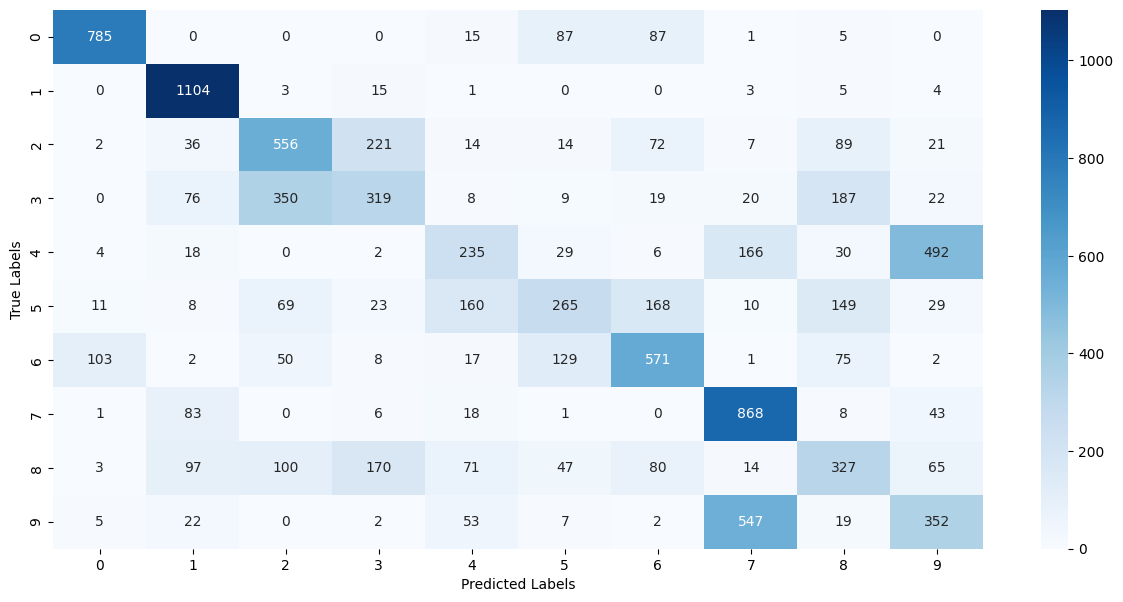

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [68]:
# For testing. input image file path

input_image_path = '/home/faraz/Downloads/Python/digit_classification/0.png'

input_image = cv2.imread(input_image_path)
input_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

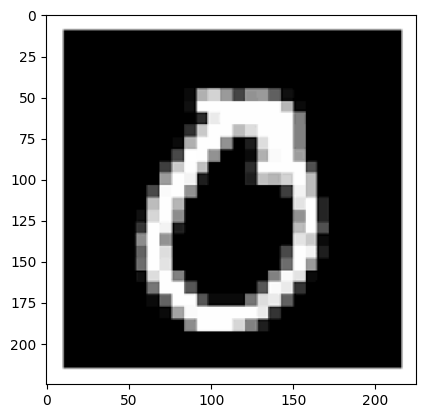

In [69]:
plt.imshow(input_image)

In [70]:
type(input_image)

numpy.ndarray

In [71]:
input_image.shape

(225, 225, 3)

In [72]:
# 3 means RGB, converting it to gray scale

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(225, 225)

In [73]:
input_image_resized = cv2.resize(grayscale, (28,28))

In [74]:
input_image_resized.shape

(28, 28)

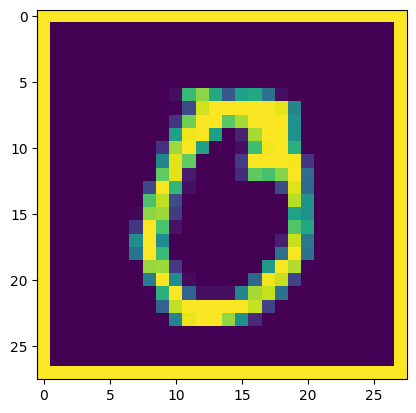

In [75]:
plt.imshow(input_image_resized)

In [76]:
input_image_resized = input_image_resized/255


In [77]:
image_reshape = np.reshape(input_image_resized, [1,28,28])
input_pred = model.predict(image_reshape)
print(input_pred)

1/1 [==============================] - 0s 15ms/step
[[8.1874979e-01 2.5683079e-05 6.5273088e-01 6.2536538e-01 5.2048182e-01
  9.1398376e-01 9.5250267e-01 7.0320035e-04 7.2811651e-01 4.4645175e-02]]


In [78]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

6


In [81]:
# Predictive System as input
# path = /home/faraz/Downloads/Python/digit_classification/9.png
input_image_path = input('Path of image to be predicted: ')

input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resized = cv2.resize(grayscale, (28,28))
input_image_resized = input_image_resized/255
image_reshape = np.reshape(input_image_resized, [1,28,28])
input_pred = model.predict(image_reshape)
input_pred_label = np.argmax(input_pred)
print('Predicted value is ', input_pred_label)

Path of image to be predicted:  /home/faraz/Downloads/Python/digit_classification/0.png


1/1 [==============================] - 0s 15ms/step
Predicted value is  6
